<a href="https://colab.research.google.com/github/yoge006/Dash_Tutorial_Series/blob/master/Machine_learning_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Get Data**

In [26]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [27]:
import pandas as pd 

def load_housing_data():
    return pd.read_csv('/content/drive/My Drive/housing.csv')

In [28]:
#load data 

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [31]:
housing.describe()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


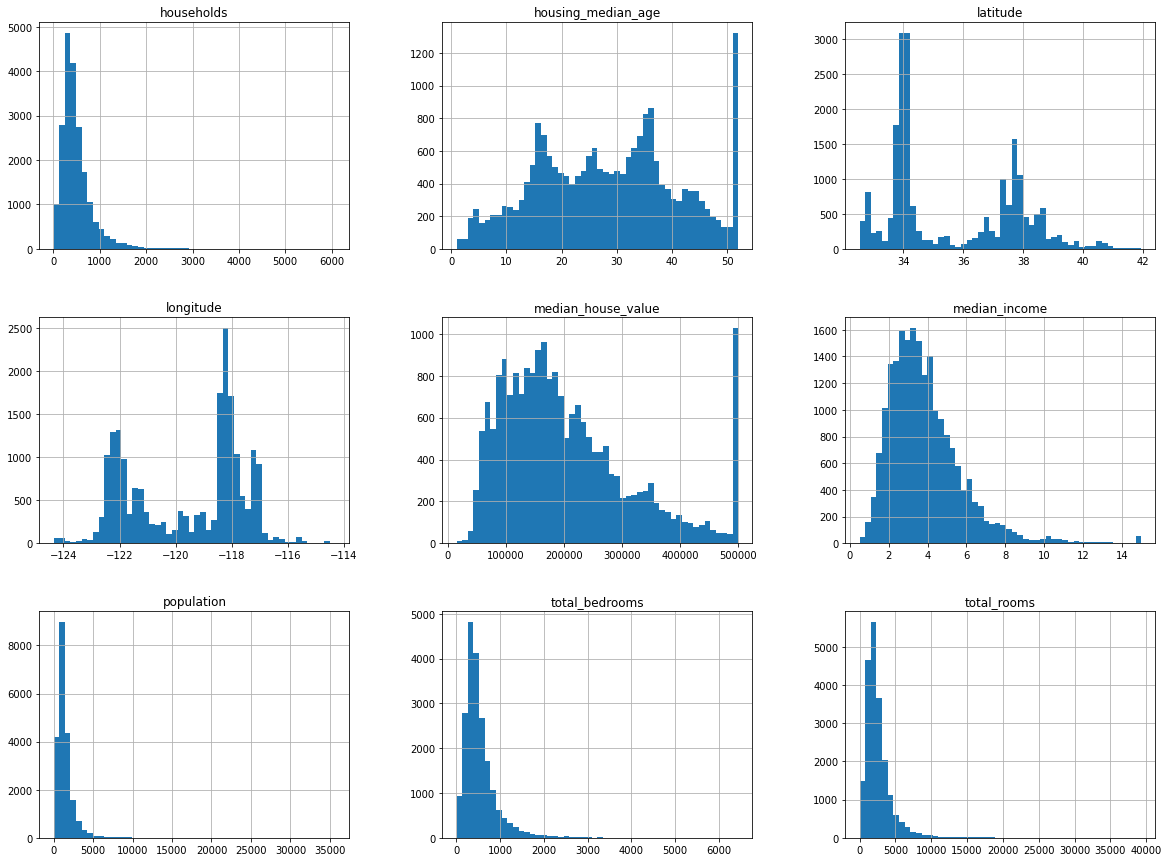

In [32]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [33]:
#Create Test set
import numpy as np

def Split_train_test(data,test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices],data.iloc[test_indices]

In [34]:
train_set,test_set = Split_train_test(housing,0.3)
print(len(train_set),'train',len(test_set),'test')

14448 train 6192 test


In [35]:
# sklearn also provide the same feature for test and train split 
# np.random.seed(42) used for ASCII generation.

from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing,test_size=0.3,random_state=42)

print(len(train_set),len(test_set))

14448 6192


In [36]:
# Median stratum for 

housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5,5.0,inplace=True)

print(housing['income_cat'])

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64


In [37]:
# Stratified Split 

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.3,random_state = 42)
for train_index,test_index in split.split(housing,housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [38]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [39]:
# drop the income_cat column 

for set in (strat_test_set,strat_train_set):
  set.drop(['income_cat'],axis=1, inplace = True)

In [40]:
# discover and visualize it 

housing = strat_train_set.copy()


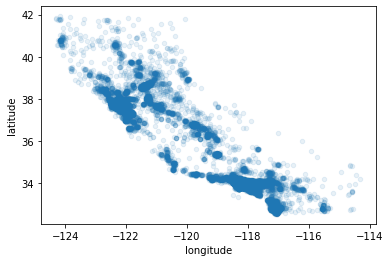

In [41]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

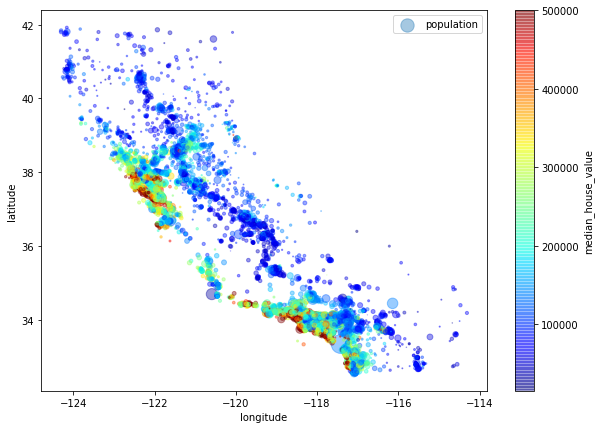

In [42]:
# color graph for housing data

# housing.plot(kind='scatter',x = 'longitude',y='latitude',alpha=0.4,
#              s=housing['population']/100,label='population',figsize=(10,7)
#              c='median_house_value',cmap = plt.get_cmap('jet'),colorbar=True)


housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [43]:
# find the correlation

corr_matrix = housing.corr()

In [44]:
# How much feature are co related with median_house_value

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687873
total_rooms           0.136801
housing_median_age    0.116305
households            0.066788
total_bedrooms        0.049523
population           -0.024592
longitude            -0.052345
latitude             -0.137864
Name: median_house_value, dtype: float64

In [45]:
#prepared data for machine learning   

housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [46]:
housing_labels

8577     500001.0
5960     203000.0
4753     192500.0
15423    121900.0
9788     250000.0
           ...   
13602     97600.0
14693    129300.0
15591    176400.0
5676     300000.0
7730     201500.0
Name: median_house_value, Length: 14448, dtype: float64

In [53]:

from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [54]:

from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [55]:

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
8577,-118.41,33.89,31,1428,320,677,331,7.2316,<1H OCEAN,4.3142,2.04532
5960,-117.83,34.11,29,2671,437,1484,445,4.9844,INLAND,6.00225,3.33483
4753,-118.33,34.04,31,1090,251,955,239,2.913,<1H OCEAN,4.56067,3.99582
15423,-117.26,33.2,13,3163,725,1675,629,2.8214,<1H OCEAN,5.02862,2.66296
9788,-120.51,35.91,39,768,162,264,118,5.3245,INLAND,6.50847,2.23729


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [64]:
housing_num_tr

array([[ 0.58073699, -0.81762236,  0.17952267, ..., -0.45834432,
        -0.09486423,  0.16297154],
       [ 0.87028331, -0.7144537 ,  0.02047048, ...,  0.22823779,
         0.02731759, -0.76597894],
       [ 0.62067442, -0.74728009,  0.17952267, ..., -0.35809719,
         0.08994605,  0.25797919],
       ...,
       [ 1.61411781, -1.06616502, -0.37715998, ...,  1.57298442,
        -0.05387063, -0.40392135],
       [ 0.64064313, -0.90203308,  0.57715313, ..., -0.38364869,
        -0.04192726,  0.37599091],
       [ 0.72051797, -0.80355391,  0.57715313, ..., -0.27023118,
        -0.00578764, -0.42244099]])

In [66]:

try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder

In [68]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

housing_prepared

array([[ 0.58073699, -0.81762236,  0.17952267, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.87028331, -0.7144537 ,  0.02047048, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62067442, -0.74728009,  0.17952267, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.61411781, -1.06616502, -0.37715998, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64064313, -0.90203308,  0.57715313, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.72051797, -0.80355391,  0.57715313, ...,  0.        ,
         0.        ,  0.        ]])

In [69]:
# apply models


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
#lets predict the value 

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

print("Labels:", list(some_labels))

Predictions: [374178.99111712 201980.40760298 176111.53526793 169535.38547485
 267767.44978406]
Labels: [500001.0, 203000.0, 192500.0, 121900.0, 250000.0]


In [71]:
#lets Evaluate the system using RMSE


from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68671.29479037311

In [72]:
# mean absolute error 

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49468.502003691734

In [73]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [74]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

housing_num = housing.drop('ocean_proximity',axis=1)

# num_attribs = list(housing_num)
# cat_attrib = ['ocean_proximity']

# num_pipeline = Pipeline([('selector',DataFrameSelector(num_attribs)),
#                          ('imputer',Imputer(strategy='median')),
#                          ('attribs_adder',CombinedAttributesAdder()),
#                          ('std_scaler',StandardScaler()),
#                          ])

# cat_pipeline = Pipeline([('selector',DataFrameSelector(cat_attrib)),
#                          ('label_binarizer',LabelBinarizer()),
#                          ])


# full_pipeline = FeatureUnion(transformer_list=[('num_pipeline',num_pipeline),
#                                                ('cat_pipeline',cat_pipeline),
#                                                ])

# housing_prepared = full_pipeline.fit_transform(housing)

# housing_prepared

In [77]:
#lets fine tune the model 


from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([69625.61788143, 69142.34339897, 70207.89727491, 71197.60848726,
       72637.37384104, 71320.17721873, 69266.66775426, 69601.97478433,
       72907.72108122, 73872.96076779])

In [78]:

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [69625.61788143 69142.34339897 70207.89727491 71197.60848726
 72637.37384104 71320.17721873 69266.66775426 69601.97478433
 72907.72108122 73872.96076779]
Mean: 70978.03424899429
Standard deviation: 1601.1617712088562
